In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Start Module pages here 9.1.5 SQLAlchemy
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create an sqlite engine from pre-existing file
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Create a base class for an automap schema
Base = automap_base()

In [7]:
# Prep SQLAlchemyreflect tables (used to reflect the schema of our code?)
Base.prepare(engine, reflect=True)

In [8]:
# View classes found by automap
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save References to Each Table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create Session Link to the Database .gitignore  climate_analysis.ipynb
session = Session(engine)

In [11]:
# Retrieve the Precipitation Data (9.2.1)
# Set a variable representing the start date at one year prior to August 23, 2017
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [12]:
# Retrieve the Precipitation Scores
# Define a variable
results = []
# Use the session.query() function to attempt a query
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [13]:
# use filter() function to remove prior years and the .all function to get the remaining data into a list.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [14]:
# Save Query Results (9.2.2)
# Create a data frame
df = pd.DataFrame(results, columns=['date','precipitation'])
print(df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [15]:
# throw out row number index and instead use the date column for the index.
# We'll use .set_index as we have before, but add "inplace = True" to modify the existing dataframe.
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [16]:
# print without the index
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [17]:
# Sort the DataFrame (9.2.3)
# Use sort_index() function
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

 2017-08-23           0.45


<AxesSubplot:xlabel='date'>

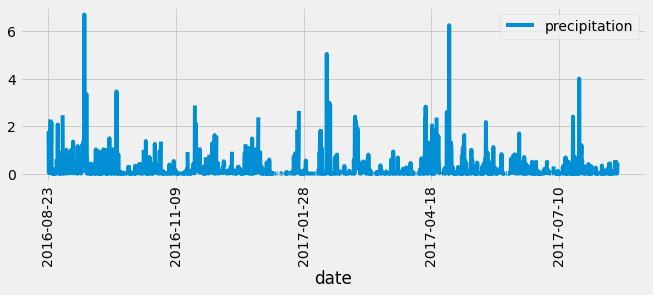

In [18]:
# Plot the Data (9.2.4)
df.plot(rot=90, figsize=(10,3))

In [19]:
# Generate the Summary (9.2.5)
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Find the Number of Stations (9.3.1) in our database
# Use the session.query() with func.count() and pass in Station.station, and then tack .all() to have it return a list.
session.query(func.count(Station.station)).all()

[(9)]

In [21]:
# Determine the Most Active Stations (9.3.2)
# Use session.query() with func.count() again and pass in Measurement.station and then tack group_by() on the end like this
# session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
# Now, let's tack on order_by() with a descending directive and add .all()
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# The left column is the station ID, and on the right are the counts for each station.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Find Low, High, and Average Temperatures (9.3.3)
# We start with a session query that includes func.min, func.max, and func.avg.
# session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
# Next, let's filter for the most active location(not because this is necessarily the best thing to do, 
# but just for practice) and of course, add .all() to return a list.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Plot the Highest Number of Observations (9.3.4)
# Measurement.tobs in order to get our total observations count,
# and filter out all the stations except the most active station.
# results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')
# Also filter for the previous year and use .all() to get a list.
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [24]:
# Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


In [25]:
print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

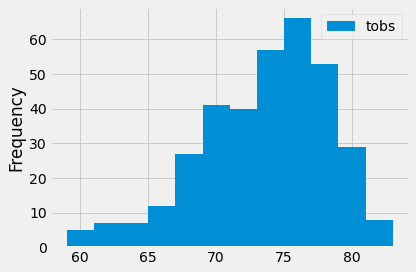

In [26]:
# Plot the Temperature Observations
df.plot.hist(bins=12)
plt.tight_layout()

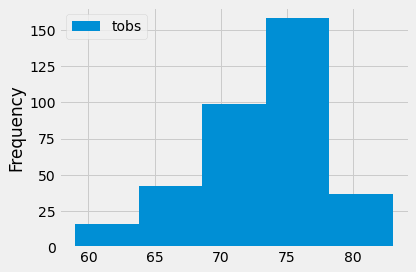

In [27]:
df.plot.hist(bins=5)
plt.tight_layout()

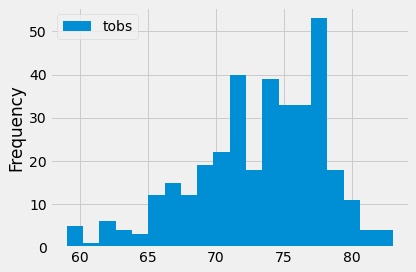

In [28]:
df.plot.hist(bins=20)
plt.tight_layout()

In [29]:
# Set Up Flask and Create a Route (9.4.3)
# Install Flask
#  Already installed: pip install flask

SyntaxError: invalid syntax (<ipython-input-29-70b12048ac26>, line 3)

In [ ]:
# pip install psycopg2-binary

In [ ]:
# Create a New Python File and Import the Flask Dependency
# In VSCode (ie. not here)create a new Python file called app.py. 
# then import Flask
from flask import Flask

In [ ]:
# Create a New Flask App Instance
app = Flask(__name__)
# This __name__ variable denotes the name of the current function. 
# You can use the __name__ variable to determine if your code is being run from the command line or if it has been imported into another piece of code. 
# Variables with underscores before and after them are called magic methods in Python.
# For more information, see this article on magic methods (https://www.geeksforgeeks.org/dunder-magic-methods-python/).

In [ ]:
# Create first route
# Begin by defining the starting point, also known as the root.
@app.route('/')
# Create a function to test the route
def hello_world():
    return 'Hello world'

In [ ]:
# Run a Flask App
# export FLASK_APP=app.py
# This doesn't work.  
#  File "<ipython-input-63-e6e9dd299d99>", line 2
#    export FLASK_APP=app.py
#                   ^
#SyntaxError: invalid syntax

In [ ]:
# So, that didn't work.  Let's try something diferent. 
# export FLASK_APP=hello_world
# flask run
#  File "<ipython-input-63-e6e9dd299d99>", line 2
#    export FLASK_APP=hello_world
#                   ^
# SyntaxError: invalid syntax